In [2]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset 

#'https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset?select=PS_20174392719_1491204439457_log.csv'

100%|████████████████████████████████████████| 178M/178M [02:25<00:00, 1.31MB/s]
100%|████████████████████████████████████████| 178M/178M [02:25<00:00, 1.28MB/s]


In [3]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
replace PS_20174392719_1491204439457_log.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [47]:
#importing neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = 'PS_20174392719_1491204439457_log.csv'

### Loading Dataset to pandas dataframe

In [69]:
df_init = pd.read_csv(dataset)
df_init.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df_init.shape

(6362620, 11)

In [48]:
df_init.head(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0


### Data Cleaning & EDA

In [8]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
# check for null values
df_init.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Observation: we observe that we have no null value

In [27]:
df_init[df_init['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [28]:
df_init['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

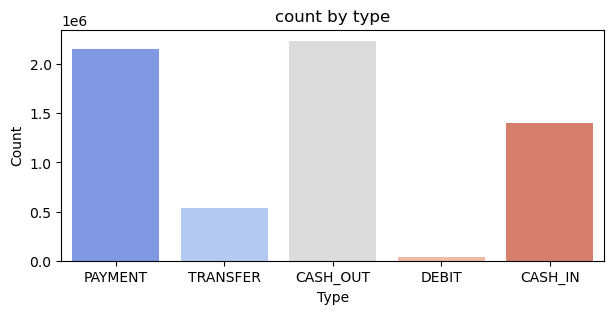

In [29]:
#visualize count by payment types

plt.figure(figsize=(7,3))
plt.title('count by type')
sns.countplot(data=df_init, x='type', palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OptionError: No such keys(s): 'mode.use_inf_as_null'

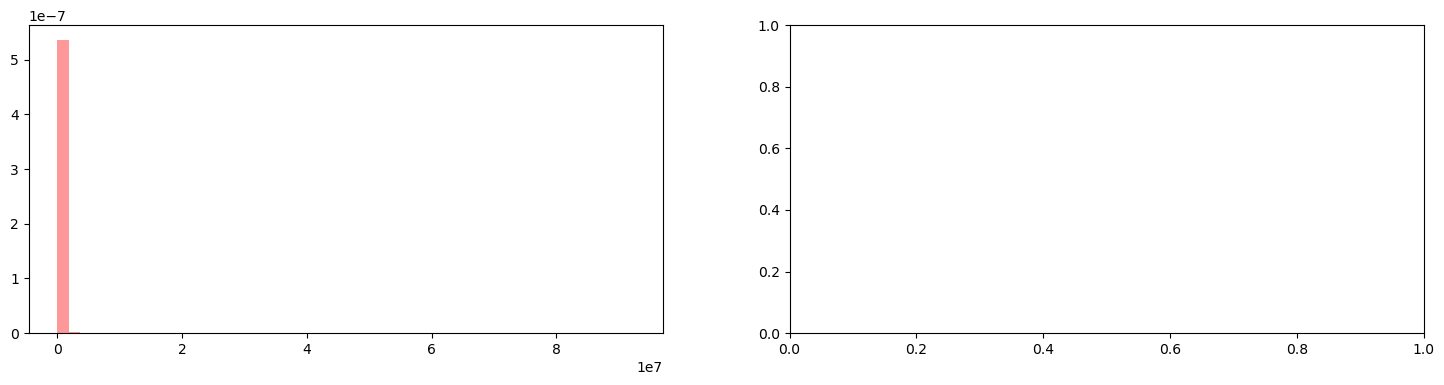

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df_init['amount'].values
time_val = df_init['step'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

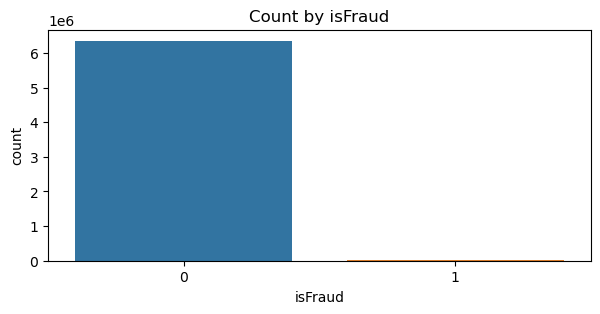

In [14]:
# Count fraud by 0 and 1
plt.figure(figsize=(7,3))
plt.title('Count by isFraud')
sns.countplot(data=df_init, x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('count')
plt.show()


Observation: We realized that theres a huge imbalance between the classes 0 and 1

In [15]:
df_init['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
#percentage of each category in Fraud column(target column)

print('No Frauds:', df_init['isFraud'].value_counts()[0]/len(df_init['isFraud'])*100)
print('Frauds:', df_init['isFraud'].value_counts()[1]/len(df_init['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


In [50]:
numerical_col= ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [51]:
num_col = df_init[numerical_col]

/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ama/mambaforge/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/

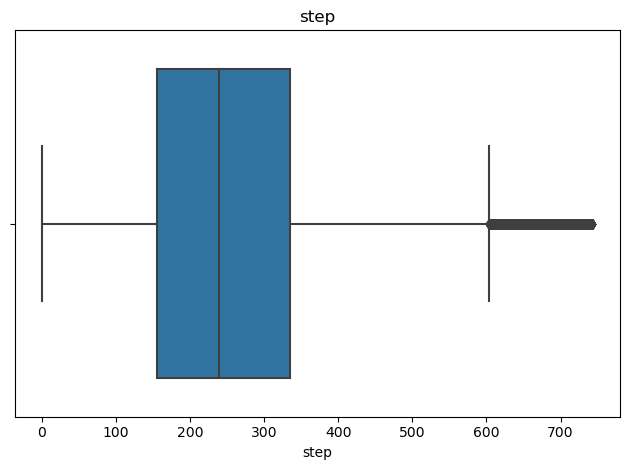

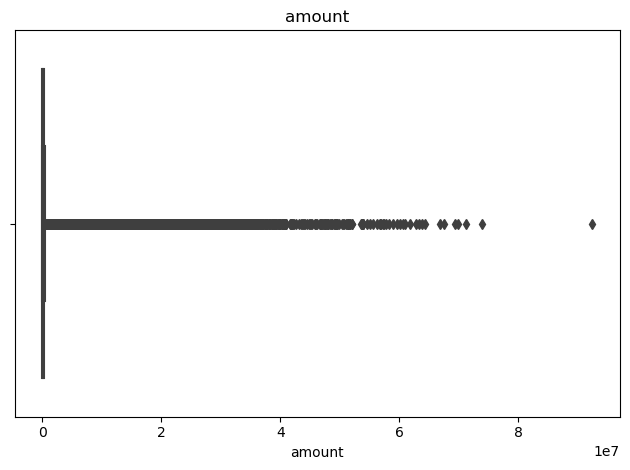

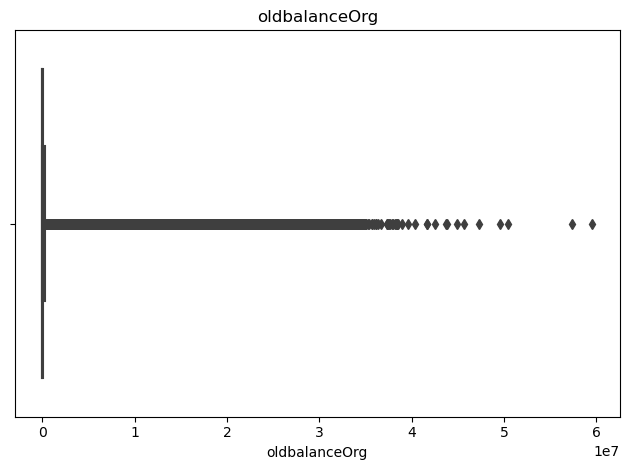

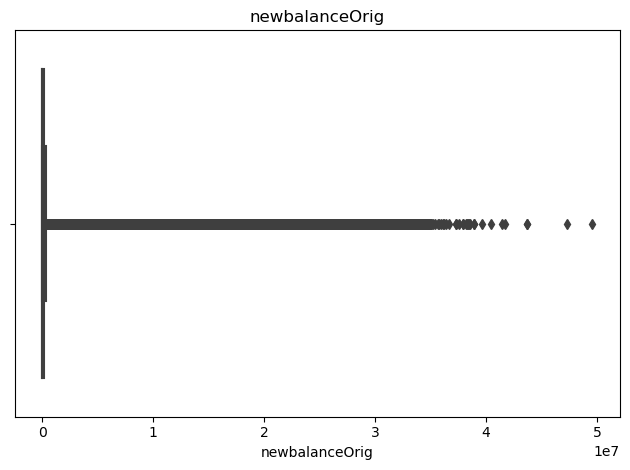

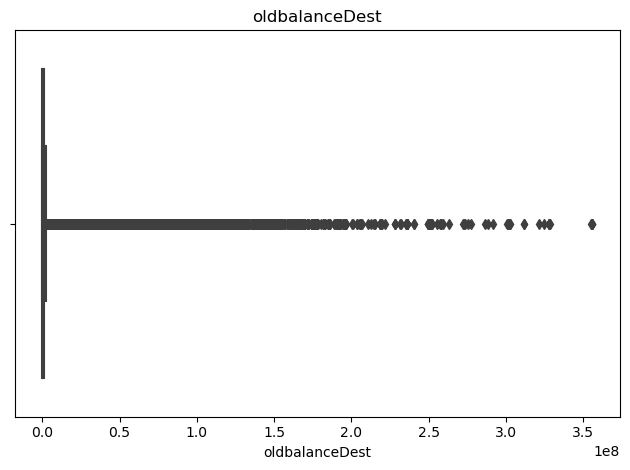

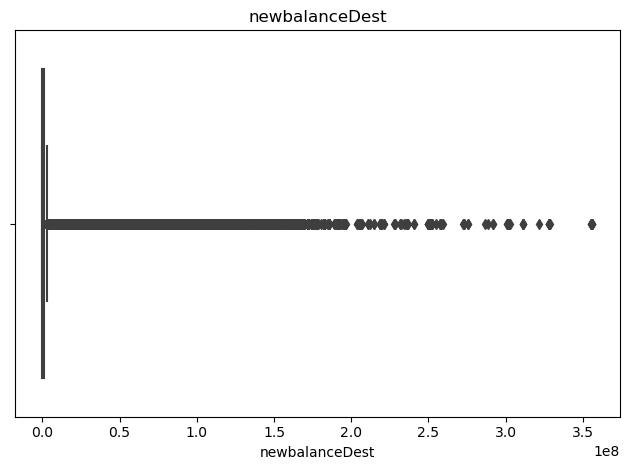

In [52]:
for col in num_col:
    fig, box = plt.subplots()
    plt.title(col)
    sns.boxplot(num_col[col], ax=box)
    plt.tight_layout()

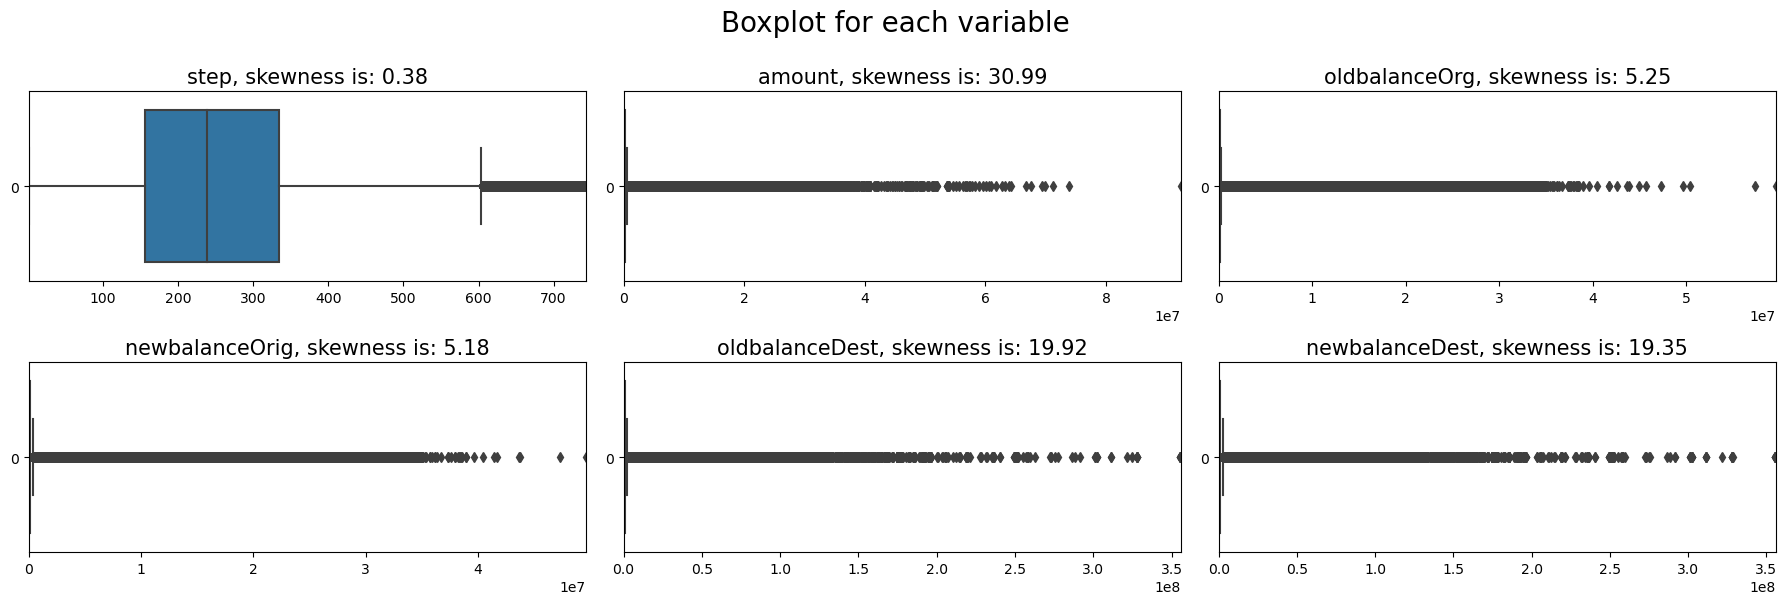

In [53]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(2,3,figsize=(18,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df_init,column=num_col)
plt.tight_layout()

In [74]:
#drop redundant column
df_init.drop(['nameOrig','nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [77]:
#showing how to use onehot encoding using pandas but we would proceed 
# with column transform using OneHotEncoder in Sklearn
df_name= pd.get_dummies(data=df_init, columns=['type'], drop_first=True)
df_name.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


#### Model training

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline([
    ('std-scaler', RobustScaler() )
])

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_att = ['type']
num_att = list(numerical_col)

full_pipe = ColumnTransformer([
    ('num', num_pipeline,num_att),
    ('cat', OneHotEncoder(),cat_att),
])

df_prep = full_pipe.fit_transform(df_init)


In [95]:
df_set = pd.DataFrame(df_prep, columns=df_name.columns)

In [96]:
df_set.head(5)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,0.0,0.0,0.0,0.0,1.0
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,0.0,1.0,0.0,0.0,0.0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0


In [114]:
x = df_set.drop('isFraud', axis=1)
y = df_set['isFraud']

#### Model Training

In [119]:
# Independent and dependent feautures
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(df_set.drop('isFraud', axis=1),df_test['isFraud'], train_size=7)

In [98]:
train_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)], axis=1)
test_data = pd.concat([pd.DataFrame(x_test), pd.DataFrame(y_train)], axis=1)

In [99]:
train_data.shape

(4453834, 11)

In [100]:
test_data.shape

(6362620, 11)

#### Handle clas imbalance with SMOTE

In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Model training 

In [120]:
# Feature Importance 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[1.22743346e-08 2.95456793e-05 3.08581622e-02 8.80982728e-02
 2.69958549e-08 6.78143042e-10 1.39440859e-01 3.47270843e-02
 4.15887121e-01 2.90958915e-01]


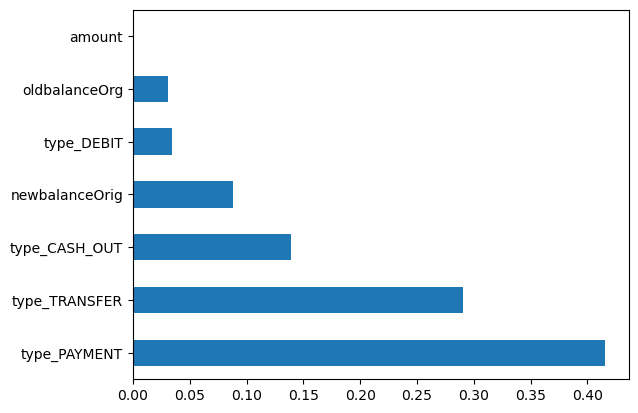

In [121]:
#Plot graph of feature importances for better visualization
important_feat = pd.Series(model.feature_importances_, index=x.columns)
important_feat.nlargest(7).plot(kind='barh')
plt.show()

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor

skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)


In [123]:
model1 = LogisticRegression()
param = {'C': 10.0 **np.arange(-1,2)}
lrs=RandomizedSearchCV(model1, param, cv=skf, n_jobs=-1, scoring='accuracy')
lrs.fit(X_train,y_train)

/Users/ama/mambaforge/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([ 0.1,  1. , 10. ])},
                   scoring='accuracy')

In [124]:
# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = lrs.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4324155  639177]
 [ 127373 1271908]]
0.8795227683971978
              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92   4963332
         1.0       0.67      0.91      0.77   1399281

    accuracy                           0.88   6362613
   macro avg       0.82      0.89      0.84   6362613
weighted avg       0.90      0.88      0.89   6362613

